In [4]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [5]:
#Reading NSS data...........
nss = pd.read_csv('KLU NSS.csv')

In [6]:
nss.head(50)

,Village,Mode of Wages/ Income,How many in the family can use the mobile?,Type of TV,Number of people in the House
0,Prathuru,Bank,4,Normal,4
1,Prathuru,Bank,4,Smart,6
2,Nuthakki,Cash,4,Normal,8
3,Nuthakki,Cash,0,NO TV,1
4,Nuthakki,Cash,2,NO TV,5
5,Nuthakki,Bank,2,Normal,5
6,Nuthakki,Cash,4,Normal,6
7,Nuthakki,Cash,4,Normal,3
8,Mellempudi,Bank,2,Normal,2
9,Mellempudi,Cash,2,Smart,8


In [9]:
nss['Village'].value_counts()

Peddapalem       602
Chirravuru       584
Athmakuru        535
Kolanukonda      332
Ippatam          281
Mellempudi       258
Chinnapalem      251
Gundimeda        225
Nuthakki         221
Revendrapadu     140
Prathuru         135
Vaddeswaram      132
Kunchenapalli     50
Seetanagaram       4
Undavalli          2
Name: Village, dtype: int64

In [10]:
nss['Mode of Wages/ Income'].value_counts()

Cash    2988
Bank     764
Name: Mode of Wages/ Income, dtype: int64

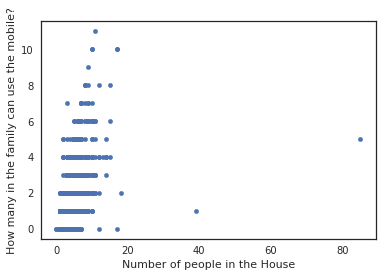

In [11]:
nss.plot(kind='scatter',x='Number of people in the House', y='How many in the family can use the mobile?')

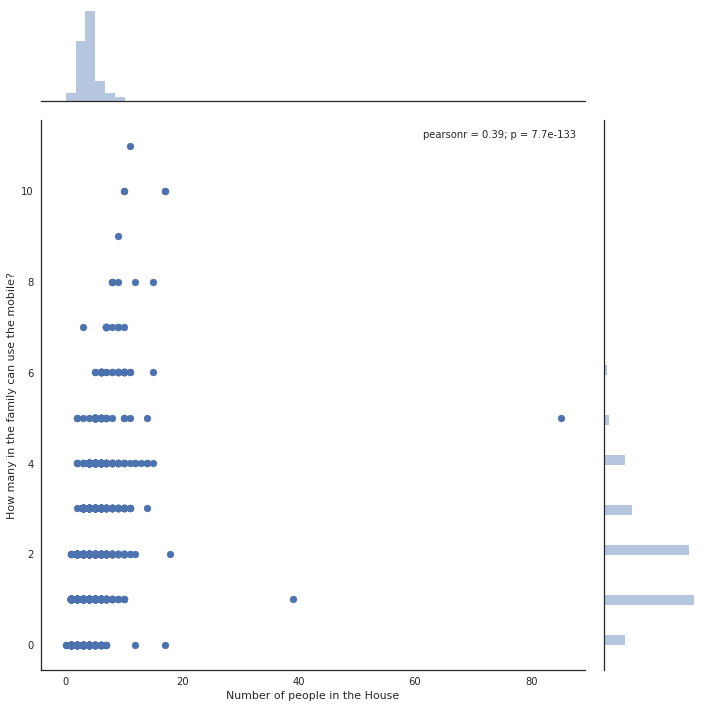

In [12]:
sns.jointplot(x='Number of people in the House', y='How many in the family can use the mobile?', data=nss, size=10)

In [13]:
nss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 5 columns):
Village                                       3752 non-null object
Mode of Wages/ Income                         3752 non-null object
How many in the family can use the mobile?    3752 non-null int64
Type of TV                                    3687 non-null object
Number of people in the House                 3752 non-null int64
dtypes: int64(2), object(3)
memory usage: 146.6+ KB


In [14]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
nss.shape

(3752, 5)

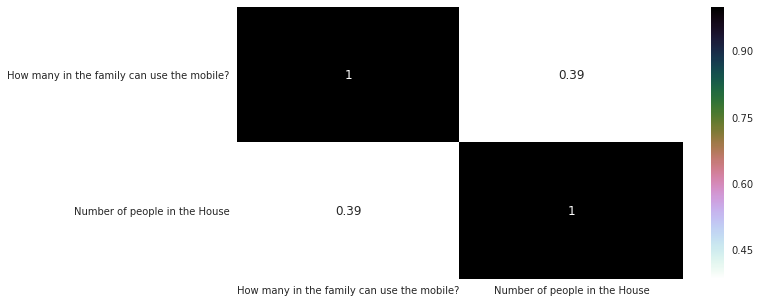

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(nss.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [17]:
train, test = train_test_split(nss, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(2626, 5)
(1126, 5)


In [21]:
train_X = train[['How many in the family can use the mobile?','Number of people in the House']] # taking the training data features
train_y = train.Village # output of the training data

test_X = test[['How many in the family can use the mobile?','Number of people in the House']] # taking test data feature
test_y = test.Village # output value of the test data

In [22]:
train_X.head()

,How many in the family can use the mobile?,Number of people in the House
3311,1,2
141,6,9
3245,1,4
1845,2,2
2547,1,2


In [23]:
test_X.head()

,How many in the family can use the mobile?,Number of people in the House
309,1,2
296,4,6
352,1,4
3046,0,3
619,0,1


In [24]:
train_y.head()


3311        Prathuru
141       Mellempudi
3245    Revendrapadu
1845      Chirravuru
2547      Peddapalem
Name: Village, dtype: object

In [25]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.180284191829


In [26]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.16785079929


In [27]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.178507992895


In [28]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.119005328597


([<matplotlib.axis.XTick at 0x7f6ec1904860>,
 <a list of 10 Text xticklabel objects>)

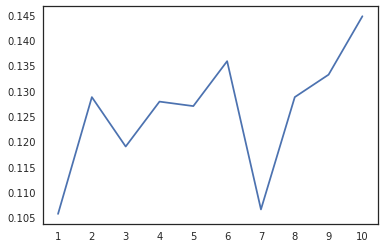

In [29]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)